This data set from https://archive.ics.uci.edu/ml/datasets/Heart+Disease contains 76 attributes and 303 lines of patient data for building models around heart disease. 

Note: The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. 

In [3]:
import pandas as pd
from pandas import *
import numpy as np
from numpy import *
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
from data_cleaning import get_clean_df, clean_df

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.info("Debug mode enabled in this notebook")

INFO:root:Debug mode enabled in this notebook


# Pull data

`cleveland_df`: Data donated from a Cleveland hospital 

`hungary_df`: Data donated from the Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. 

`switzerland_df`: Data set donated by two doctors at University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. and University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.

`va_df`: Data donated by V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D. 

In [5]:
# cleveland_df = get_clean_df(raw_path ='processed.cleveland.txt', use_cache = True)

# print("Got {:,} rows, with {} columns:".format(*cleveland_df.shape))
# cleveland_df.dtypes

#pull in the full 76 columns - need to find a way to clean this
# with open('cleveland.txt', 'rb') as f:
#   text = f.read()
# text.str.decode("utf-8")


In [6]:
# hungary_df = get_clean_df(raw_path ='processed.hungarian.txt', use_cache=True)

# print("Got {:,} rows, with {} columns:".format(*hungary_df.shape))
# hungary_df.dtypes

In [7]:
# switzerland_df = get_clean_df(raw_path = 'processed.switzerland.txt', use_cache=True)

# print("Got {:,} rows, with {} columns:".format(*switzerland_df.shape))
# switzerland_df.dtypes

In [8]:
va_df = get_clean_df(raw_path ='processed.va.txt', use_cache=False)

print("Got {:,} rows, with {} columns:".format(*va_df.shape))
va_df.dtypes

DEBUG:data_cleaning:Cleaning HD data


Got 200 rows, with 14 columns:


age            int64
sex            int64
pain           int64
BP           float64
chol         float64
fbs          float64
ecg            int64
maxhr        float64
eiang        float64
eist         float64
slope        float64
vessels      float64
thal         float64
diagnosis      int64
dtype: object

# Data Exploration

In [9]:
# Top 10 most frequent in each column
topN = 10
for col in va_df.columns:
    vc = va_df[col].value_counts(dropna=False)
    print(f"-- {col} --\n{vc.head(topN)}\n\n")

-- age --
63    15
62    15
55    14
60    12
58    12
61    12
57    10
64     9
56     9
69     8
Name: age, dtype: int64


-- sex --
1    194
0      6
Name: sex, dtype: int64


-- pain --
4    131
3     47
2     14
1      8
Name: pain, dtype: int64


-- BP --
NaN       56
 120.0    16
 130.0    15
 140.0    10
 150.0     9
 110.0     9
 160.0     8
 122.0     6
 142.0     5
 144.0     4
Name: BP, dtype: int64


-- chol --
 0.0      49
NaN        7
 220.0     4
 258.0     4
 203.0     4
 186.0     3
 214.0     3
 223.0     3
 240.0     3
 219.0     3
Name: chol, dtype: int64


-- fbs --
 0.0    125
 1.0     68
NaN       7
Name: fbs, dtype: int64


-- ecg --
1    93
0    80
2    27
Name: ecg, dtype: int64


-- maxhr --
NaN       53
 140.0    12
 120.0    12
 110.0     8
 112.0     6
 130.0     6
 100.0     4
 105.0     4
 118.0     4
 160.0     4
Name: maxhr, dtype: int64


-- eiang --
 1.0    95
NaN     53
 0.0    52
Name: eiang, dtype: int64


-- eist --
NaN     56
 0.0    40
 2.0  

In [29]:
va_df

,age,sex,pain,BP,chol,fbs,ecg,maxhr,eiang,eist,diagnosis
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,0
5,66,1,3,120.0,0.0,0.0,1,120.0,0.0,-0.5,0
6,65,1,4,150.0,236.0,1.0,1,105.0,1.0,0.0,3
7,60,1,3,180.0,0.0,0.0,1,140.0,1.0,1.5,0
8,60,1,3,120.0,0.0,NaN,0,141.0,1.0,2.0,3
9,60,1,2,160.0,267.0,1.0,1,157.0,0.0,0.5,1


In [27]:
#dropped due to missing data (75% + missing)
va_df = va_df.drop(['thal','vessels','slope'], axis = 1)

# Variable Selection


In [28]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statsmodels.api as sm


X = va_df.iloc[:,0:9]
y = x.diagnosis


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

MissingDataError: exog contains inf or nans

# Building the model

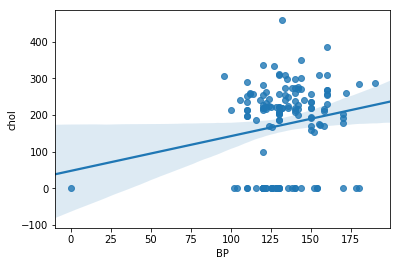

In [11]:
sns.regplot(x=va_df['BP'], y=va_df['chol'])

# linear regression 
# 10-fold cross validation

In [14]:
x = va_df['BP']
y = va_df['chol']

model = sm.OLS(y,x)
estt = model.fit()
print(estt.summary())

MissingDataError: exog contains inf or nans